<a href="https://colab.research.google.com/github/wbsogithub0101/datamining/blob/main/random_forest_and_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Lab 8 - CCPS 844 Data Mining</font>
### <font color='red'> Answer the following questions and submit a PDF file on the D2L.</font>


**Select a dataset of your choice.**

* Apply Random Forest and Decision Tree
* Evaluate the algos by changing parameter "criterion" for both (entropy, gini) and "n_estimators" for Random Forest
* Compare your results (evaluation metrics)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
wine_data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_data['target'] = np.random.randint(0,2, size=len(wine_data))
wine_data['saleability'] = np.random.randint(0,2, size=len(wine_data))


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,saleability
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.00000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.50000,0.505618
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.50141,0.501379
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.00000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.00000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,0.50000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,1.00000,1.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,1.00000,1.000000


In [ ]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,saleability
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


**Create a histogram of two alcohol distributions on top of each other, one for each class of wine (target column).**

Text(0.5, 0, 'alcohol')

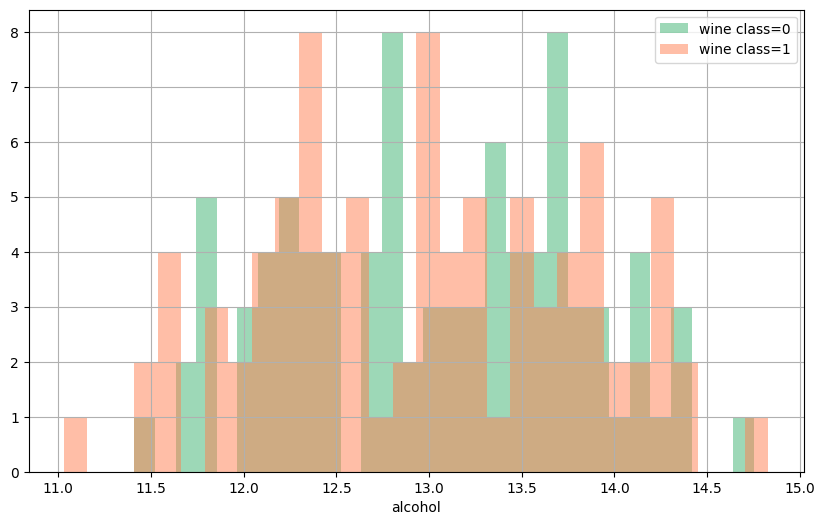

In [ ]:
plt.figure(figsize=(10,6))
wine_data[wine_data['target']==0]['alcohol'].hist(alpha=0.5,color='mediumseagreen',
                                              bins=30,label='wine class=0')
wine_data[wine_data['target']==1]['alcohol'].hist(alpha=0.5,color='coral',
                                              bins=30,label='wine class=1')

plt.legend()
plt.xlabel('alcohol')

**Create a histogram of two alcohol distributions on top of each other, one for each ash level.**

Text(0.5, 0, 'alcohol')

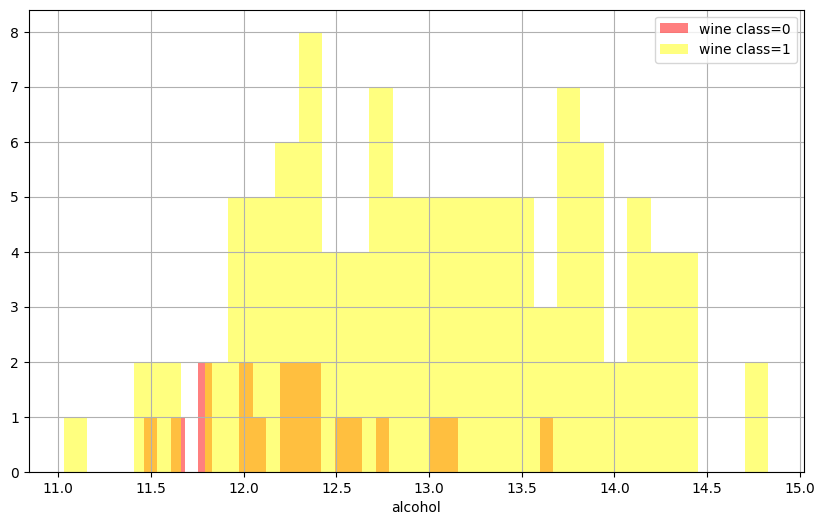

In [ ]:
plt.figure(figsize=(10,6))
wine_data[wine_data['ash'].between(0, 2.0)]['alcohol'].hist(alpha=0.5,color='red',
                                              bins=30,label='wine class=0')
wine_data[wine_data['ash'].between(2.0,2.5)]['alcohol'].hist(alpha=0.5,color='yellow',
                                              bins=30,label='wine class=1')

plt.legend()
plt.xlabel('alcohol')

** *italicized text*Create a countplot using seaborn showing the counts of wine classes or targets, with the color hue defined by type of wine.**

<Axes: xlabel='target', ylabel='count'>

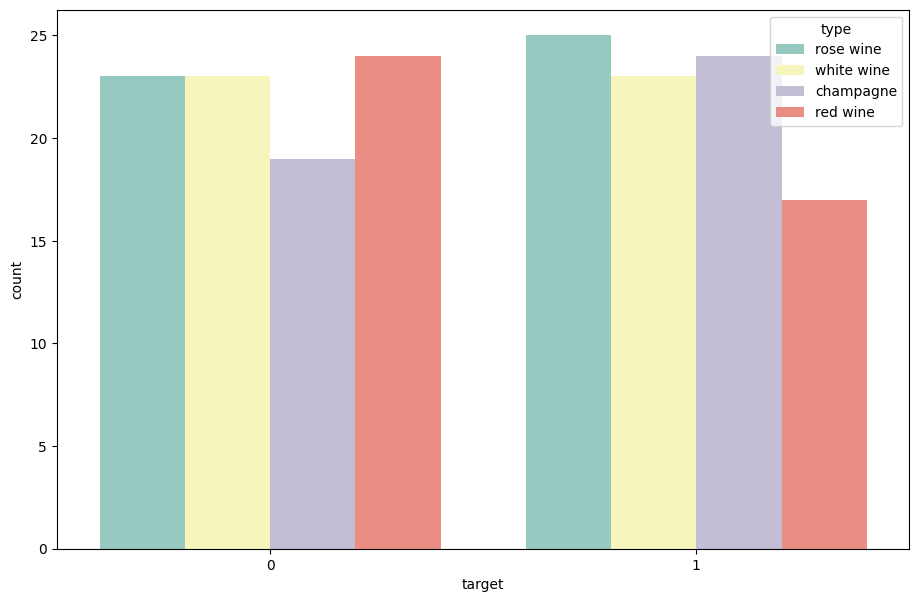

In [ ]:
plt.figure(figsize=(11,7))
import random
import seaborn as sns
wine_data['type'] = pd.Series(random.choices(['red wine','white wine', 'rose wine', 'champagne'], weights=[1,1,1,1], k=len(wine_data)))

sns.countplot(x='target',hue='type',data=wine_data,palette='Set3')

**Let's see the trend between alcohol level and proanthocyanins. Recreate the following jointplot.**

> Indented block



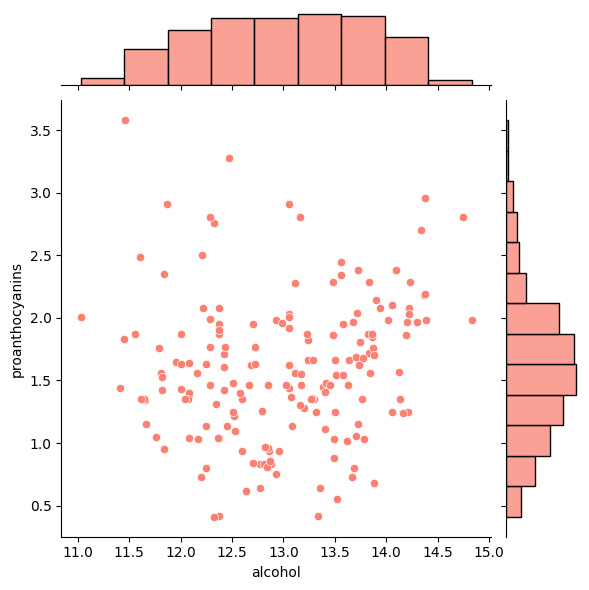

In [ ]:
sns.jointplot(x='alcohol',y='proanthocyanins',data=wine_data,color='salmon')

Create the following lmplots to see if the trend differed between class of wine and wine saleability.

<Figure size 1100x700 with 0 Axes>

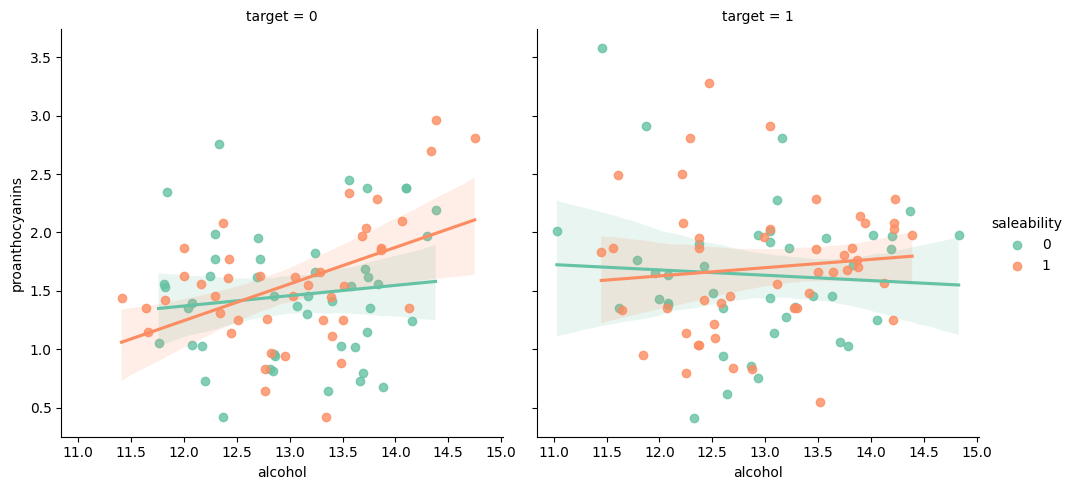

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='proanthocyanins',x='alcohol',data=wine_data,hue='saleability',
           col='target',palette='Set2')

**Check wine_data.info() again.**

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Notice that the **wine type** column as categorical
**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [ ]:
cat_feats = ['type']

In [ ]:
wine_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'saleability',
       'type'],
      dtype='object')

Now use pd.get_dummies(wine_data,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

In [ ]:
final_data = pd.get_dummies(wine_data,columns=cat_feats,drop_first=True)

In [ ]:
final_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'saleability',
       'type_red wine', 'type_rose wine', 'type_white wine'],
      dtype='object')

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Now its time to split our data into a training set and a testing set!

Use sklearn to split your data into a training set and a testing set as we've done in the past.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('target',axis=1)
y = final_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49        25
           1       0.54      0.48      0.51        29

    accuracy                           0.50        54
   macro avg       0.50      0.50      0.50        54
weighted avg       0.50      0.50      0.50        54



In [ ]:
print(confusion_matrix(y_test,predictions))

[[13 12]
 [15 14]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,predictions))
print(precision_score(y_test,predictions))

0.5
0.5384615384615384


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

Predictions and Evaluation
Let's predict off the y_test values and evaluate our model.

Predict the class of wine class for the X_test data.

In [ ]:
predictions1 = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.56      0.52      0.54        29

    accuracy                           0.52        54
   macro avg       0.52      0.52      0.52        54
weighted avg       0.52      0.52      0.52        54



In [ ]:
print(confusion_matrix(y_test,predictions1))

[[13 12]
 [14 15]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,predictions1))
print(precision_score(y_test,predictions1))

0.5185185185185185
0.5555555555555556


**the decision tree model has accuracy score and precision score of 0.46296296296296297 and 0.42857142857142855 respectively while the random forest has accuracy score and precision score of 0.4444444444444444 and 0.41935483870967744

Thus the decision tree model has both higher accuracy score and higher precision score than the random forest model in this example **

**COMPARING DIFFERENT RANDOM FOREST MODELS (GINI, ENTROPY, N_ESTIMATION OF DIFFERENT VALUES)**

In [ ]:
rfc1 = RandomForestClassifier(n_estimators=600, criterion='gini')
rfc1.fit(X_train,y_train)
predictions_gini = rfc1.predict(X_test)
print("classification_report for criterion gini is \n ", classification_report(y_test,predictions_gini))
print("\n confusion_matrix for criterion gini is \n ", confusion_matrix(y_test,predictions_gini))
print("\n accuracy_score for criterion gini is \n ", accuracy_score(y_test,predictions_gini))
print("\n precision_score for criterion gini is \n", precision_score(y_test,predictions_gini))

classification_report for criterion gini is 
                precision    recall  f1-score   support

           0       0.50      0.48      0.49        25
           1       0.57      0.59      0.58        29

    accuracy                           0.54        54
   macro avg       0.53      0.53      0.53        54
weighted avg       0.54      0.54      0.54        54


 confusion_matrix for criterion gini is 
  [[12 13]
 [12 17]]

 accuracy_score for criterion gini is 
  0.5370370370370371

 precision_score for criterion gini is 
 0.5666666666666667


In [ ]:
rfc2 = RandomForestClassifier(n_estimators=600, criterion='entropy')
rfc2.fit(X_train,y_train)
predictions_entropy = rfc2.predict(X_test)
print("classification_report for criterion entropy is \n ", classification_report(y_test,predictions_entropy))
print("\n confusion_matrix for criterion entropy is \n ", confusion_matrix(y_test,predictions_entropy))
print("\n accuracy_score for criterion entropy is \n ", accuracy_score(y_test,predictions_entropy))
print("\n precision_score for criterion entropy is \n", precision_score(y_test,predictions_entropy))

classification_report for criterion entropy is 
                precision    recall  f1-score   support

           0       0.44      0.48      0.46        25
           1       0.52      0.48      0.50        29

    accuracy                           0.48        54
   macro avg       0.48      0.48      0.48        54
weighted avg       0.48      0.48      0.48        54


 confusion_matrix for criterion entropy is 
  [[12 13]
 [15 14]]

 accuracy_score for criterion entropy is 
  0.48148148148148145

 precision_score for criterion entropy is 
 0.5185185185185185


**Therefore when n_estimators is held constant, accuracy score and precision score are both higher for criterion gini**

In [ ]:
rfc3 = RandomForestClassifier(n_estimators=100, criterion='gini')
rfc3.fit(X_train,y_train)
predictions_gini2 = rfc3.predict(X_test)
print("classification_report for criterion gini is \n ", classification_report(y_test,predictions_gini2))
print("\n confusion_matrix for criterion gini is \n ", confusion_matrix(y_test,predictions_gini2))
print("\n accuracy_score for criterion gini is \n ", accuracy_score(y_test,predictions_gini2))
print("\n precision_score for criterion gini is \n", precision_score(y_test,predictions_gini2))

classification_report for criterion gini is 
                precision    recall  f1-score   support

           0       0.44      0.44      0.44        25
           1       0.52      0.52      0.52        29

    accuracy                           0.48        54
   macro avg       0.48      0.48      0.48        54
weighted avg       0.48      0.48      0.48        54


 confusion_matrix for criterion gini is 
  [[11 14]
 [14 15]]

 accuracy_score for criterion gini is 
  0.48148148148148145

 precision_score for criterion gini is 
 0.5172413793103449


In [ ]:
rfc4 = RandomForestClassifier(n_estimators=1000, criterion='gini')
rfc4.fit(X_train,y_train)
predictions_gini4 = rfc4.predict(X_test)
print("classification_report for criterion gini is \n ", classification_report(y_test,predictions_gini4))
print("\n confusion_matrix for criterion gini is \n ", confusion_matrix(y_test,predictions_gini4))
print("\n accuracy_score for criterion gini is \n ", accuracy_score(y_test,predictions_gini4))
print("\n precision_score for criterion gini is \n", precision_score(y_test,predictions_gini4))

classification_report for criterion gini is 
                precision    recall  f1-score   support

           0       0.52      0.56      0.54        25
           1       0.59      0.55      0.57        29

    accuracy                           0.56        54
   macro avg       0.56      0.56      0.55        54
weighted avg       0.56      0.56      0.56        54


 confusion_matrix for criterion gini is 
  [[14 11]
 [13 16]]

 accuracy_score for criterion gini is 
  0.5555555555555556

 precision_score for criterion gini is 
 0.5925925925925926


**Holding the criterion constant as 'gini' and varying the n_estimator as value of 100, 600, 1000, the highest accuracy score and precision score both occur at n_estimator=1000**